In [20]:
%pylab nbagg


Populating the interactive namespace from numpy and matplotlib


Here, we define the functions that will be used to approximate pi and to analyse its convergence behaviour. 

In [137]:
#does a numerical integral to estimate pi
#intakes n, the number of terms in the riemann sum we will be calculating
#returns area, the calculated approximation of pi
def num_integration(n):
    n=100
    x = linspace(0,1,n)
    f = lambda x: sqrt(1-x**2)
    area = (sum(f(x))*1/n)*4
    return area

#does a monte_carlo estimation for a cerain number of points in the square
#intakes an integer of the total number of darts to be thrown
#returns the estimation of pi
from scipy.optimize import curve_fit

def monte_carlo(total): 
    inside = 0
    for i in range(0,total):
        x2 = random.random()**2
        y2 = random.random()**2
        if sqrt(x2+y2) <1.0:
            inside += 1     
    pi = (float(inside)/total)*4
    return pi 

#checks the accuracy of an approximation of pi
#intakes the obtained experimental value 
#returns a tuple containing the absolute difference and the percent difference
def check_pi(obtained_val):
    abs_dif = abs(pi - obtained_val)
    return abs_dif*100 / pi
  
    
#defines the exponential function that will be fit to the graph of our percentage error
def func(x,a,b,c):
    return a*np.exp(-b*x)+c




        

Here, we plot the percent difference between pi and our approximation using numerical integration and analyze its convergence behaviour

<IPython.core.display.Javascript object>


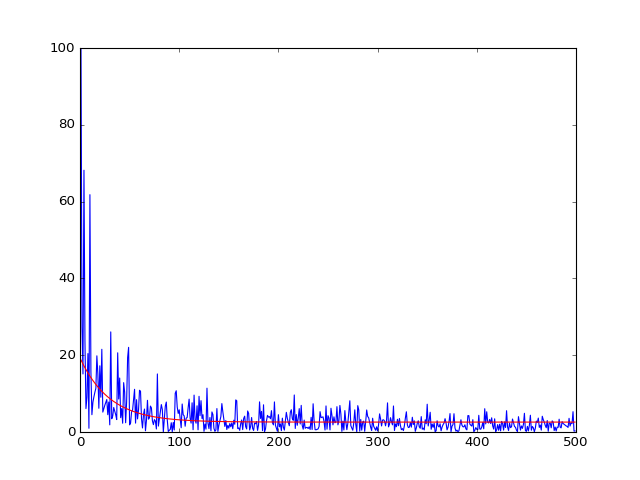

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in multiply


In [136]:
rnge = 500
n_val = arange(1,rnge,1)

ni_approx = [num_integration(n_val[i]) for i in range(rnge-1)] #list of all pi approximations using different number numerical integration approximations
errors = [check_pi(mc_approx[i]) for i in range(rnge-1)]#list of all percentage errors between pi and each approximation

plot(n_val,errors)
xlim(0,rnge)
ylim(0,100)

popt, pcov = curve_fit(func, x, y)

plot(n_val, func(n_val, *popt), '-r')

Here, we plot the percent difference between pi and our approximation using numerical integration and analyze its convergence behaviour

<IPython.core.display.Javascript object>


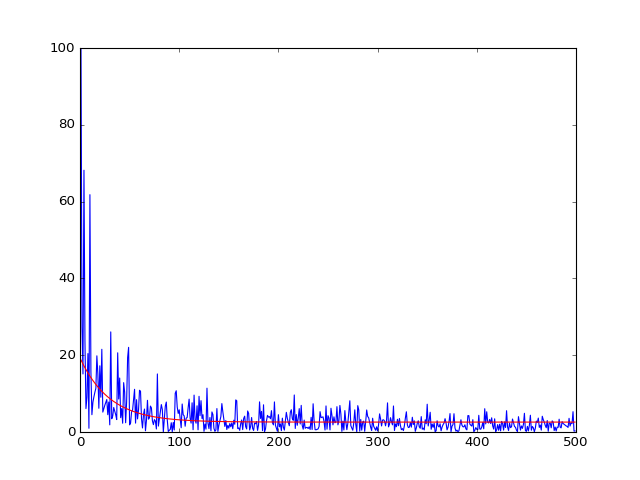

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in multiply


In [135]:

rnge = 500
n_val = arange(1,rnge,1)

mc_approx = [monte_carlo(n_val[i]) for i in range(rnge-1)] #list of all pi approximations using different number monte carlo approximations
errors =  [check_pi(mc_approx[i]) for i in range(rnge-1)] #list of all percentage errors between pi and each approximation

plot(n_val,errors)
xlim(0,rnge)
ylim(0,100)

popt, pcov = curve_fit(func, x, y)

plot(n_val, func(n_val, *popt), '-r')